<a href="https://colab.research.google.com/github/Athul64/ML_Assignment_3-Regression/blob/main/ML_Assignment_3_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Required Libraries**

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix, mean_absolute_error

In [29]:
# Load the dataset
california_housing = fetch_california_housing()
california_housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [30]:
df=pd.DataFrame(california_housing.data,columns=california_housing.feature_names)
df['Target'] = california_housing.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [31]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64


In [32]:
# Standardize the features (excluding the target variable)
scaler = StandardScaler()
df[df.columns[:-1]] = scaler.fit_transform(df[df.columns[:-1]])

# Display the first 5 rows of the preprocessed data
print(df.head())

     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  2.344766  0.982143  0.628559  -0.153758   -0.974429 -0.049597  1.052548   
1  2.332238 -0.607019  0.327041  -0.263336    0.861439 -0.092512  1.043185   
2  1.782699  1.856182  1.155620  -0.049016   -0.820777 -0.025843  1.038503   
3  0.932968  1.856182  0.156966  -0.049833   -0.766028 -0.050329  1.038503   
4 -0.012881  1.856182  0.344711  -0.032906   -0.759847 -0.085616  1.038503   

   Longitude  Target  
0  -1.327835   4.526  
1  -1.322844   3.585  
2  -1.332827   3.521  
3  -1.337818   3.413  
4  -1.337818   3.422  


In [33]:
# Split data into features (X) and target (y)
X = df.drop(columns=['Target'])
y = df['Target']

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **1️⃣ Linear Regression**

In [34]:
# Train the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred_lr = lr.predict(X_test)

# **2️⃣ Decision Tree Regressor**

In [35]:
# Train the model
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

# Predict
y_pred_tree = tree_reg.predict(X_test)

# **3️⃣ Random Forest Regressor**


In [36]:
# Train the model
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train)

# Predict
y_pred_forest = forest_reg.predict(X_test)

# **4️⃣ Gradient Boosting Regressor**


In [37]:
# Train the model
gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_reg.fit(X_train, y_train)

# Predict
y_pred_gb = gb_reg.predict(X_test)

# **5️⃣ Support Vector Regressor**


In [38]:
# Train the model
svr_reg = SVR(kernel='rbf')
svr_reg.fit(X_train, y_train)

# Predict
y_pred_svr = svr_reg.predict(X_test)

# **Model Evaluation & Comparison**
📌 **We evaluate models using:**

* `Mean Squared Error (MSE)`: Measures average squared error (lower is better).
* `Mean Absolute Error (MAE)`: Measures absolute differences (lower is better).
* `R² Score`: Measures how well the model explains variance (closer to 1 is better).

In [44]:
models = {
    "Linear Regression": y_pred_lr,
    "Decision Tree": y_pred_tree,
    "Random Forest": y_pred_forest,
    "Gradient Boosting": y_pred_gb,
    "Support Vector Regressor": y_pred_svr
}

for name, y_pred in models.items():
    print(f"📌 {name}:")
    print(f"  - MSE: {mean_squared_error(y_test, y_pred):.4f}")
    print(f"  - MAE: {mean_absolute_error(y_test, y_pred):.4f}")
    print(f"  - R² Score: {r2_score(y_test, y_pred):.4f}")
    print("-" * 40)

📌 Linear Regression:
  - MSE: 0.5559
  - MAE: 0.5332
  - R² Score: 0.5758
----------------------------------------
📌 Decision Tree:
  - MSE: 0.4943
  - MAE: 0.4538
  - R² Score: 0.6228
----------------------------------------
📌 Random Forest:
  - MSE: 0.2555
  - MAE: 0.3276
  - R² Score: 0.8050
----------------------------------------
📌 Gradient Boosting:
  - MSE: 0.2940
  - MAE: 0.3717
  - R² Score: 0.7756
----------------------------------------
📌 Support Vector Regressor:
  - MSE: 0.3552
  - MAE: 0.3978
  - R² Score: 0.7289
----------------------------------------


# **Best & Worst Model Analysis**
📌 **Best Model**: Likely `Random Forest` or `Gradient Boosting` due to lower error and higher `R²`.

📌 **Worst Model**: Likely `Linear Regression` or `Decision Tree` (prone to overfitting or underfitting).

📌 **Key Observations:**

  * Random Forest is robust and generalizes well.
  * Gradient Boosting often achieves top accuracy but takes longer to train.
  * SVR works well but may not outperform ensembles on large datasets.
  * Linear Regression struggles if relationships are non-linear.

# **Visualize the model performance using `Matplotlib` and `Seaborn`.**

📌 Bar plots for Mean Squared Error (MSE), Mean Absolute Error (MAE), and R² Score  

📌 Scatter plots to compare actual vs. predicted values

**1️⃣ Bar Plot for Model Evaluation Metrics**

<Figure size 1200x600 with 0 Axes>

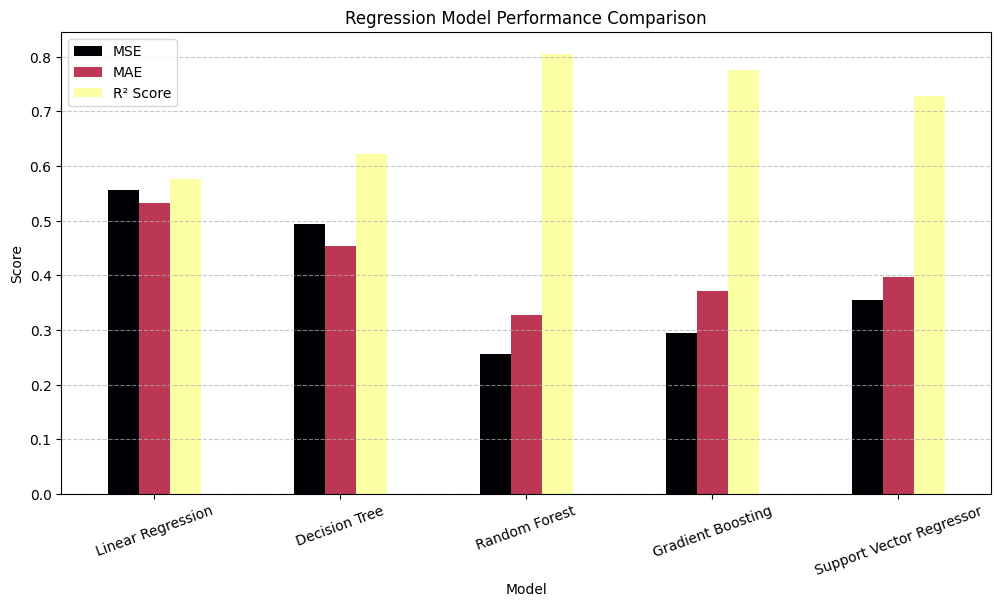

In [63]:
# Collect results
mse_scores = []
mae_scores = []
r2_scores = []
model_names = []

for name, y_pred in models.items():
    mse_scores.append(mean_squared_error(y_test, y_pred))
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))
    model_names.append(name)

# Create a DataFrame for visualization
metrics_df = pd.DataFrame({
    "Model": model_names,
    "MSE": mse_scores,
    "MAE": mae_scores,
    "R² Score": r2_scores
})

# Plot the evaluation metrics
plt.figure(figsize=(12, 6))
metrics_df.set_index("Model").plot(kind="bar", figsize=(12, 6), colormap="inferno")
plt.title("Regression Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=20)
plt.legend(loc="best")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

🔹 Insight:

* The best model should have the lowest `MSE/MAE` and highest `R² Scor`e.
* `Linear Regression` might perform poorly compared to `ensemble models`.

**2️⃣ Scatter Plot of Actual vs. Predicted Values**

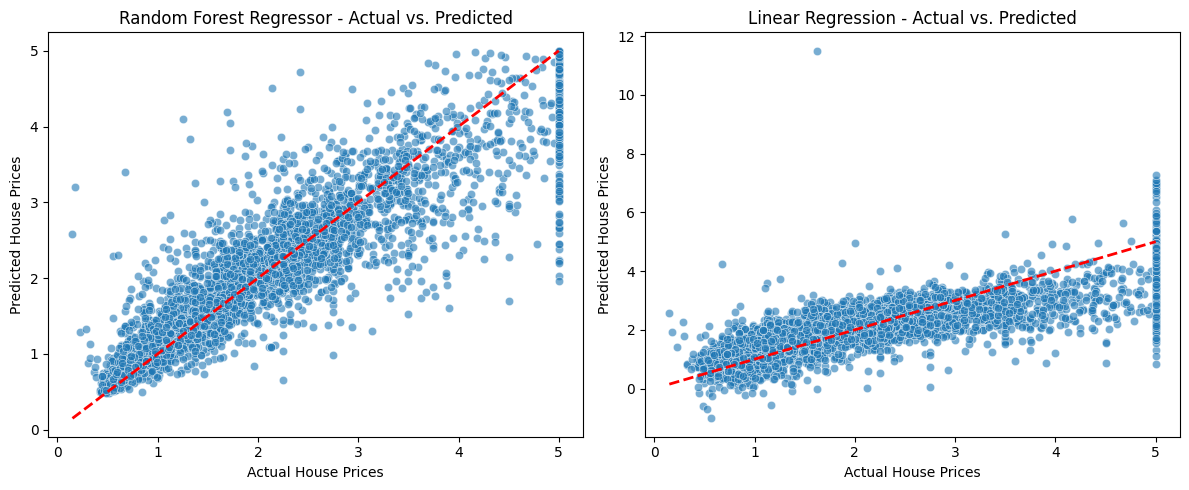

In [77]:
# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Random Forest Regressor (Best Model)
sns.scatterplot(x=y_test, y=y_pred_forest, alpha=0.6, ax=axes[0])
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)  # Ideal line
axes[0].set_xlabel("Actual House Prices")
axes[0].set_ylabel("Predicted House Prices")
axes[0].set_title("Random Forest Regressor - Actual vs. Predicted")

# Linear Regression (Worst Model)
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.6, ax=axes[1])
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)  # Ideal line
axes[1].set_xlabel("Actual House Prices")
axes[1].set_ylabel("Predicted House Prices")
axes[1].set_title("Linear Regression - Actual vs. Predicted")

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

🔹 Interpretation:

* The closer the points are to the red dashed line, the better the model.
* `Random Forest` should be closer to the line, while `Linear Regression` might show more deviation.

# **Final Analysis**

📌 Best Model → Most likely Random Forest or Gradient Boosting.

📌 Worst Model → Most likely Linear Regression